# By Godwin Adegbehingbe

# Agenda
*  About Dataset
*  Loading Libraries 
*  Loading Data
*  Understanding Data
*  Data Cleaning
*  Preprocessing and Wrangling
*  Separating Input/Independent and Output/Dependent Variables
*  Splitting the data
*  Building Model
*  Evaluating the data
*  Prediction
*  Model Performance

## About Dataset

A hospital in the province of Greenland has been trying to improve its care conditions by looking at historic survival of the patients. They tried looking at their data but could not identify the main factors leading to high survivals.

Objective
Develop a model that will predict the chances of survival of a patient after 1 year of treatment (Survived_1_year).


About the dataset
The dataset contains the patient records collected from a hospital in Greenland. The "Survived_1_year" column is a target variable which has binary entries (0 or 1).
	• Survived_1_year == 0, implies that the patient did not survive after 1 year of treatment
	• Survived_1_year == 1, implies that the patient survived after 1 year of treatment

dataset link: ('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Trainin
	• ID_Patient_Care_Situation: Care situation of a patient during treatment
	• Diagnosed_Condition: The diagnosed condition of the patient
	• ID_Patient: Patient identifier number
	• Treatment_with_drugs: Class of drugs used during treatment
	• Survived_1_year: If the patient survived after one year (0 means did not survive; 1 means survived)
	• Patient_Age: Age of the patient
	• Patient_Body_Mass_Index: A calculated value based on the patient’s weight, height, etc.
	• Patient_Smoker: If the patient was a smoker or not
	• Patient_Rural_Urban: If the patient stayed in Rural or Urban part of the country
	• Previous_Condition: Condition of the patient before the start of the treatment ( This variable is splitted into 8 columns - A, B, C, D, E, F, Z and Number_of_prev_cond. A, B, C, D, E, F and Z are the previous conditions of the patient. Suppose for one patient, if the entry in column A is 1, it means that the previous condition of the patient was A. If the patient didn't have that condition, it is 0 and same for other conditions. If a patient has previous condition as A and C , columns A and C will have entries as 1 and 1 respectively while the other column B, D, E, F, Z will have entries 0, 0, 0, 0, 0 respectively. The column Number_of_prev_cond will have entry as 2 i.e. 1 + 0 + 1 + 0 + 0 + 0 + 0 + 0 = 2 in this case. )

# Loading Libraries

In [44]:
import pandas as pd # A fundamental package for linear algebra and multidimensional arrays
import numpy as np  # Data analysis and data manipulating tool
import random  # Library to generate random numbers




#Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns 

# To ignore warnings in the notebook
import warnings
warnings.filterwarnings("ignore")


# Loading Data

In [45]:
#pharma_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Training_set_begs.csv')
#test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Testing_set_begs.csv')
train_df = pd.read_csv("Train_Data.csv")
test_df= pd.read_csv("Test_Data.csv")

# Getting Basic Idea About Data

In [46]:
train_df.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


In [47]:
test_df.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond
0,19150,40,3709,DX3,16,29.443894,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,23216,52,986,DX6,24,26.836321,NO,URBAN,Stable,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
2,11890,50,11821,DX4 DX5,63,25.523280,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
3,7149,32,3292,DX6,42,27.171155,NO,URBAN,Stable,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0
4,22845,20,9959,DX3,50,25.556192,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [48]:
train_df.info()  # Returns a concise summary of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  23097 non-null  int64  
 1   Diagnosed_Condition        23097 non-null  int64  
 2   Patient_ID                 23097 non-null  int64  
 3   Treated_with_drugs         23084 non-null  object 
 4   Patient_Age                23097 non-null  int64  
 5   Patient_Body_Mass_Index    23097 non-null  float64
 6   Patient_Smoker             23097 non-null  object 
 7   Patient_Rural_Urban        23097 non-null  object 
 8   Patient_mental_condition   23097 non-null  object 
 9   A                          21862 non-null  float64
 10  B                          21862 non-null  float64
 11  C                          21862 non-null  float64
 12  D                          21862 non-null  float64
 13  E                          21862 non-null  flo

In [49]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9303 entries, 0 to 9302
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  9303 non-null   int64  
 1   Diagnosed_Condition        9303 non-null   int64  
 2   Patient_ID                 9303 non-null   int64  
 3   Treated_with_drugs         9303 non-null   object 
 4   Patient_Age                9303 non-null   int64  
 5   Patient_Body_Mass_Index    9303 non-null   float64
 6   Patient_Smoker             9303 non-null   object 
 7   Patient_Rural_Urban        9303 non-null   object 
 8   Patient_mental_condition   9303 non-null   object 
 9   A                          9303 non-null   float64
 10  B                          9303 non-null   float64
 11  C                          9303 non-null   float64
 12  D                          9303 non-null   float64
 13  E                          9303 non-null   float

In [50]:
train_df.shape

(23097, 18)

In [51]:
test_df.shape

(9303, 17)

There are 18 columns with 23,097 observations

In [52]:
#Taking a look at the target variable
train_df["Survived_1_year"].value_counts()

1    14603
0     8494
Name: Survived_1_year, dtype: int64

Survived_1_year: If the patient survived after one year (0 means did not survive; 1 means survived)
    
8494 patients did not survive after one year , 14603 survived 

In [53]:
train_df["Survived_1_year"].value_counts() / len(train_df) * 100

1    63.224661
0    36.775339
Name: Survived_1_year, dtype: float64

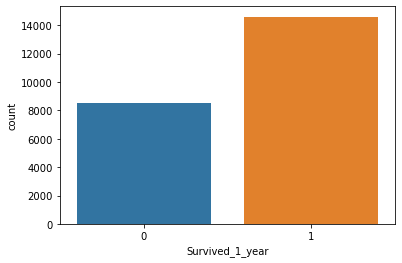

In [54]:
# we can also use countplot form seaborn to plot the above information graphically.
sns.countplot(train_df["Survived_1_year"])

# Missing Values

In [55]:
train_df.isnull().sum()

ID_Patient_Care_Situation       0
Diagnosed_Condition             0
Patient_ID                      0
Treated_with_drugs             13
Patient_Age                     0
Patient_Body_Mass_Index         0
Patient_Smoker                  0
Patient_Rural_Urban             0
Patient_mental_condition        0
A                            1235
B                            1235
C                            1235
D                            1235
E                            1235
F                            1235
Z                            1235
Number_of_prev_cond          1235
Survived_1_year                 0
dtype: int64

In [56]:
test_df.isnull().sum()

ID_Patient_Care_Situation    0
Diagnosed_Condition          0
Patient_ID                   0
Treated_with_drugs           0
Patient_Age                  0
Patient_Body_Mass_Index      0
Patient_Smoker               0
Patient_Rural_Urban          0
Patient_mental_condition     0
A                            0
B                            0
C                            0
D                            0
E                            0
F                            0
Z                            0
Number_of_prev_cond          0
dtype: int64

In [57]:
train_df.isnull().sum() / len(train_df) * 100   # To get percentage of missing data in each column

ID_Patient_Care_Situation    0.000000
Diagnosed_Condition          0.000000
Patient_ID                   0.000000
Treated_with_drugs           0.056284
Patient_Age                  0.000000
Patient_Body_Mass_Index      0.000000
Patient_Smoker               0.000000
Patient_Rural_Urban          0.000000
Patient_mental_condition     0.000000
A                            5.347015
B                            5.347015
C                            5.347015
D                            5.347015
E                            5.347015
F                            5.347015
Z                            5.347015
Number_of_prev_cond          5.347015
Survived_1_year              0.000000
dtype: float64

# Dealing with Missing Values

In [58]:
##Step 1a. Single Imputation Technique
#Impute Numeric Variables with mean of the variable

# filling missing values of numerical columns with mean value.
num_cols = train_df.select_dtypes(include=np.number).columns      # getting all the numerical columns

train_df[num_cols] = train_df[num_cols].fillna(train_df[num_cols].mean())   # fills the missing values with mean

print(train_df.loc[:,num_cols].mean())

ID_Patient_Care_Situation    16545.712041
Diagnosed_Condition             26.413127
Patient_ID                    6261.280772
Patient_Age                     33.209768
Patient_Body_Mass_Index         23.454820
A                                0.897905
B                                0.136355
C                                0.185070
D                                0.083615
E                                0.393239
F                                0.053700
Z                                0.000595
Number_of_prev_cond              1.750480
Survived_1_year                  0.632247
dtype: float64


In [59]:
## Impute Categorical Variables with mode of the variable
cat_cols =train_df.select_dtypes(include = 'object').columns    # getting all the categorical columns

train_df[cat_cols] = train_df[cat_cols].fillna(train_df[cat_cols].mode().iloc[0])  # fills the missing values with maximum occuring element in the column


In [60]:
# Let's have a look if there still exist any missing values
train_df.isnull().sum() / len(train_df) * 100

ID_Patient_Care_Situation    0.0
Diagnosed_Condition          0.0
Patient_ID                   0.0
Treated_with_drugs           0.0
Patient_Age                  0.0
Patient_Body_Mass_Index      0.0
Patient_Smoker               0.0
Patient_Rural_Urban          0.0
Patient_mental_condition     0.0
A                            0.0
B                            0.0
C                            0.0
D                            0.0
E                            0.0
F                            0.0
Z                            0.0
Number_of_prev_cond          0.0
Survived_1_year              0.0
dtype: float64

Datasets properly cleaned with no missing Value

# One Hot Encoding (Creating Dummies for categorical columns)

In [61]:
train_df = pd.get_dummies(train_df, columns=cat_cols)# earlier we have collected all the categorical columns in cat_cols
test_df =pd.get_dummies(test_df,columns=cat_cols)

In [62]:
train_df.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,...,Treated_with_drugs_DX4,Treated_with_drugs_DX4 DX5,Treated_with_drugs_DX5,Treated_with_drugs_DX6,Patient_Smoker_Cannot say,Patient_Smoker_NO,Patient_Smoker_YES,Patient_Rural_Urban_RURAL,Patient_Rural_Urban_URBAN,Patient_mental_condition_Stable
0,22374,8,3333,56,18.479385,1.0,0.0,0.0,0.0,1.0,...,0,0,0,1,0,0,1,0,1,1
1,18164,5,5740,36,22.945566,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,1,0,1
2,6283,23,10446,48,27.510027,1.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,1,1,0,1
3,5339,51,12011,5,19.130976,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,1,1
4,33012,0,12513,128,1.348400,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,1,0,0,1,0,1


In [63]:
train_df.columns
#a lot of dummy variables are created 

Index(['ID_Patient_Care_Situation', 'Diagnosed_Condition', 'Patient_ID',
       'Patient_Age', 'Patient_Body_Mass_Index', 'A', 'B', 'C', 'D', 'E', 'F',
       'Z', 'Number_of_prev_cond', 'Survived_1_year',
       'Treated_with_drugs_DX1 ', 'Treated_with_drugs_DX1 DX2 ',
       'Treated_with_drugs_DX1 DX2 DX3 ',
       'Treated_with_drugs_DX1 DX2 DX3 DX4 ',
       'Treated_with_drugs_DX1 DX2 DX3 DX4 DX5 ',
       'Treated_with_drugs_DX1 DX2 DX3 DX5 ',
       'Treated_with_drugs_DX1 DX2 DX4 ',
       'Treated_with_drugs_DX1 DX2 DX4 DX5 ',
       'Treated_with_drugs_DX1 DX2 DX5 ', 'Treated_with_drugs_DX1 DX3 ',
       'Treated_with_drugs_DX1 DX3 DX4 ',
       'Treated_with_drugs_DX1 DX3 DX4 DX5 ',
       'Treated_with_drugs_DX1 DX3 DX5 ', 'Treated_with_drugs_DX1 DX4 ',
       'Treated_with_drugs_DX1 DX4 DX5 ', 'Treated_with_drugs_DX1 DX5 ',
       'Treated_with_drugs_DX2 ', 'Treated_with_drugs_DX2 DX3 ',
       'Treated_with_drugs_DX2 DX3 DX4 ',
       'Treated_with_drugs_DX2 DX3 DX4 DX5 

In [64]:
test_df.columns

Index(['ID_Patient_Care_Situation', 'Diagnosed_Condition', 'Patient_ID',
       'Patient_Age', 'Patient_Body_Mass_Index', 'A', 'B', 'C', 'D', 'E', 'F',
       'Z', 'Number_of_prev_cond', 'Treated_with_drugs_DX1 ',
       'Treated_with_drugs_DX1 DX2 ', 'Treated_with_drugs_DX1 DX2 DX3 ',
       'Treated_with_drugs_DX1 DX2 DX3 DX4 ',
       'Treated_with_drugs_DX1 DX2 DX3 DX4 DX5 ',
       'Treated_with_drugs_DX1 DX2 DX3 DX5 ',
       'Treated_with_drugs_DX1 DX2 DX4 ',
       'Treated_with_drugs_DX1 DX2 DX4 DX5 ',
       'Treated_with_drugs_DX1 DX2 DX5 ', 'Treated_with_drugs_DX1 DX3 ',
       'Treated_with_drugs_DX1 DX3 DX4 ',
       'Treated_with_drugs_DX1 DX3 DX4 DX5 ',
       'Treated_with_drugs_DX1 DX3 DX5 ', 'Treated_with_drugs_DX1 DX4 ',
       'Treated_with_drugs_DX1 DX4 DX5 ', 'Treated_with_drugs_DX1 DX5 ',
       'Treated_with_drugs_DX2 ', 'Treated_with_drugs_DX2 DX3 ',
       'Treated_with_drugs_DX2 DX3 DX4 ',
       'Treated_with_drugs_DX2 DX3 DX4 DX5 ',
       'Treated_with_dr

# Pre-Processing and Data Wrangling:
Train Test Data Split - to evaluate performance in an unbiased manner

# Separate Input Features and Output Features

In [65]:
# Separate input features and output feature(set X and y variables)

y = train_df['Survived_1_year'] # input features
X= train_df.loc[:,train_df.columns != 'Survived_1_year']  # output feature



# Standardization / Normalization

In [66]:
from sklearn.preprocessing import StandardScaler
scaled_features = StandardScaler().fit_transform(X)
scaled_features = pd.DataFrame(data=scaled_features)
scaled_features.columns= X.columns

In [67]:
# Let's see how the data looks after scaling
scaled_features.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,...,Treated_with_drugs_DX4,Treated_with_drugs_DX4 DX5,Treated_with_drugs_DX5,Treated_with_drugs_DX6,Patient_Smoker_Cannot say,Patient_Smoker_NO,Patient_Smoker_YES,Patient_Rural_Urban_RURAL,Patient_Rural_Urban_URBAN,Patient_mental_condition_Stable
0,0.611441,-1.225048,-0.814336,1.165773,-1.306719,0.346593,-0.408415,-0.489825,-0.310482,1.276771,...,-0.29002,-0.136586,-0.300164,1.296062,-0.023731,-1.159584,1.160919,-1.522204,1.522204,0.0
1,0.169773,-1.424641,-0.144965,0.142727,-0.133747,0.346593,-0.408415,-0.489825,-0.310482,-0.827471,...,-0.29002,-0.136586,-0.300164,-0.771568,-0.023731,-1.159584,1.160919,0.656942,-0.656942,0.0
2,-1.076652,-0.227079,1.163743,0.756555,1.065036,0.346593,-0.408415,-0.489825,-0.310482,-0.827471,...,-0.29002,-0.136586,-0.300164,1.296062,-0.023731,-1.159584,1.160919,0.656942,-0.656942,0.0
3,-1.175687,1.635794,1.598960,-1.442995,-1.135589,0.346593,-0.408415,-0.489825,-0.310482,-0.827471,...,-0.29002,-0.136586,-0.300164,-0.771568,-0.023731,0.862378,-0.861386,-1.522204,1.522204,0.0
4,1.727464,-1.757297,1.738563,4.848739,-5.805900,-3.048217,-0.408415,-0.489825,-0.310482,-0.827471,...,-0.29002,-0.136586,-0.300164,1.296062,42.138964,-1.159584,-0.861386,0.656942,-0.656942,0.0


# Splitting the dataset into train and test data

In [68]:
# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# X_train: independent feature data for training the model
# y_train: dependent feature data for training the model
# X_test: independent feature data for testing the model; will be used to predict the target values
# y_test: original target values of X_test; We will compare this values with our predicted values.
 
# test_size = 0.3: 30% of the data will go for test set and 70% of the data will go for train set
# random_state = 42: this will fix the split i.e. there will be same split for each time you run the code

# Dealing with Imbalanced Data


Most machine learning algorithms work best when the number of samples in each class are about equal. This is because most algorithms are designed to maximize accuracy and reduce error. Again this can't be generalized and we must be very case specific depending on the nature of data and its underlying context

Resampling Techniques - Oversample Minority Class: Oversampling can be defined as adding more copies of the minority class. In other words, we are creating artificial/synthetic data of the minority class (or group). Oversampling could be a good choice when you don’t have a lot of data to work with.
We will use the resampling module from Scikit-Learn library to randomly create artificial samples of data from the minority class.

Important Note

BEFORE you try any oversampling techniques you must split your data into train and test datasets!

Why it should be done that? Oversampling before splitting the data can allow the exact same observations to be present in both the test and train sets. This can allow our model to simply memorize specific data points and cause overfitting and poor generalization to the test data

In [69]:
# 'resample' is located under sklearn.utils
from sklearn.utils import resample

In [70]:
# concatenate training data back together
train_data = pd.concat([X_train, y_train], axis = 1)

In [71]:
# separate minority and majority class
not_survived = train_data[train_data.Survived_1_year==0]
survived = train_data[train_data.Survived_1_year==1]

#pharma_data["Survived_1_year"]

In [72]:
# Unsample minority; we are oversampling the minority class to match the number of majority classs
not_survived_upsampled = resample(not_survived,
                           replace = True, # Sample with replacement
                           n_samples = len(survived), # Match number in majority class
                           random_state=27)

In [73]:
# combine majority and upsampled minority
upsampled = pd.concat([survived, not_survived_upsampled])

In [74]:
# Now let's check the classes count
upsampled.Survived_1_year.value_counts()

1    10241
0    10241
Name: Survived_1_year, dtype: int64

In [75]:
X = upsampled.drop(columns=["Survived_1_year"])
y=  upsampled.Survived_1_year

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)



# Modelling

In [76]:
# Building the Logistic Regression model
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(random_state=1)      
lr_baseline_model = clf_lr.fit(X_train,y_train)

# Noting down accuracy of the baseline model
from sklearn.metrics import accuracy_score, f1_score

# finding our predicted values
y_pred = lr_baseline_model.predict(X_test)

# Calculating the accuracy and F1 Score by comparing the actual and predicted values
ac = accuracy_score(y_test, y_pred)
f_score = f1_score(y_test ,y_pred )

print("Baseline Model Accuracy:", ac)

print("Baseline Model F1 Score:", f_score)

Baseline Model Accuracy: 0.6605370219690806
Baseline Model F1 Score: 0.6540630182421228


In [77]:
import xgboost as xgb #importing xgboost model from xgb library
xgc = xgb.XGBClassifier(n_estimators=500, max_depth=5, random_state=42) # Creating a XGB Classifier

xgc.fit(X_train, y_train) # Training the model with fit method

# Noting down accuracy of the baseline model
from sklearn.metrics import accuracy_score, f1_score

# finding our predicted values
y_pred = xgc.predict(X_test)

# Calculating the accuracy and F1 Score by comparing the actual and predicted values
ac = accuracy_score(y_test, y_pred)
f_score = f1_score(y_test ,y_pred )

print("Baseline Model Accuracy:", ac)

print("Baseline Model F1 Score:", f_score)

[00:20:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Baseline Model Accuracy: 0.8909682668836453
Baseline Model F1 Score: 0.8875838926174496


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier
rf_clf = RandomForestClassifier(n_estimators=10000, random_state=1, n_jobs=-1)

# n_estimators = The number of trees in the forest.
# n_jobs = -1 : Use all processors for training

# Train the classifier
rf_clf.fit(X_train, y_train)

# Noting down accuracy of the baseline model
from sklearn.metrics import accuracy_score, f1_score

# finding our predicted values
y_pred = rf_clf.predict(X_test)

# Calculating the accuracy and F1 Score by comparing the actual and predicted values
ac = accuracy_score(y_test, y_pred)
f_score = f1_score(y_test ,y_pred )

print("Baseline Model Accuracy:", ac)

print("Baseline Model F1 Score:", f_score)

# Hyper Parameter Tuning

In [ ]:
## RamdomForestClassifier using grid search CV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth':range(3,20)}
clf = GridSearchCV(RandomForestClassifier(), parameters, n_jobs=4,cv=5,scoring = 'accuracy')
clf.fit(X_train, y_train)
dt = clf.best_estimator_  #final decision tree!
print (clf.best_score_, clf.best_params_)



In [ ]:
train_df.columns #= train_df.drop('Patient_Smoker_Cannot say',axis=1)

clf.fit(train_df.drop('Survived_1_year',axis=1),train_df['Survived_1_year'])


# Evaluation

In [ ]:
#Random Forest Classifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
# Making predictions
y_pred = clf.predict(X_test)

# Measuring the accuracy of the model
print(f'Accuracy score: {accuracy_score(y_test, y_pred)}')
print('\n')
print(f'{classification_report(y_test, y_pred)}')

In [ ]:
# Confusion matrix

#Random Forest Classifier
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
fig, ax = plt.subplots(figsize=(15,7))
disp.plot(ax=ax)
plt.show()

In [ ]:
#XGBoost

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
# Making predictions
y_pred = xgc.predict(X_test)

# Measuring the accuracy of the model
print(f'Accuracy score: {accuracy_score(y_test, y_pred)}')
print('\n')
print(f'{classification_report(y_test, y_pred)}')

In [ ]:
# Confusion matrix

#XGBoost
cm = confusion_matrix(y_test, y_pred, labels=xgc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgc.classes_)
fig, ax = plt.subplots(figsize=(15,7))
disp.plot(ax=ax)
plt.show()

# Predictions for Test data

In [ ]:
test_df["Survived_1_year"] = clf.predict(test_df)

In [ ]:
predictions = test_df["Survived_1_year"]

# # Create a submission file
sub_file = samplesubmission.copy()
sub_file.is_survived = predictions

# Check the distribution of your predictions
plt.figure(figsize=(8, 5))
sns.countplot(sub_file.is_survived)
plt.title('Predictions Data Distribution');

In [241]:
# Create file
sub_file.to_csv('submission_file.csv', index = False)